In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [ ]:
df = pd.read_csv("/content/index.csv")

In [ ]:
df.head()

,Year,Month,Day,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate
0,1954,7,1,NaN,NaN,NaN,0.80,4.6,5.8,NaN
1,1954,8,1,NaN,NaN,NaN,1.22,NaN,6.0,NaN
2,1954,9,1,NaN,NaN,NaN,1.06,NaN,6.1,NaN
3,1954,10,1,NaN,NaN,NaN,0.85,8.0,5.7,NaN
4,1954,11,1,NaN,NaN,NaN,0.83,NaN,5.3,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          904 non-null    int64  
 1   Month                         904 non-null    int64  
 2   Day                           904 non-null    int64  
 3   Federal Funds Target Rate     462 non-null    float64
 4   Federal Funds Upper Target    103 non-null    float64
 5   Federal Funds Lower Target    103 non-null    float64
 6   Effective Federal Funds Rate  752 non-null    float64
 7   Real GDP (Percent Change)     250 non-null    float64
 8   Unemployment Rate             752 non-null    float64
 9   Inflation Rate                710 non-null    float64
dtypes: float64(7), int64(3)
memory usage: 70.8 KB


In [ ]:
df.isnull().sum()

Year                              0
Month                             0
Day                               0
Federal Funds Target Rate       442
Federal Funds Upper Target      801
Federal Funds Lower Target      801
Effective Federal Funds Rate    152
Real GDP (Percent Change)       654
Unemployment Rate               152
Inflation Rate                  194
dtype: int64

In [ ]:
len(df)

904

Handling missing values


In [ ]:
df = df.drop(['Federal Funds Upper Target', 'Federal Funds Lower Target'], axis=1)


In [ ]:
Effective Federal Funds Rate,Unemployment Rate,Inflation Rate

In [ ]:
### mean immputation in Effective Federal Funds Rate,Unemployment Rate,Inflation Rate
### as they have lower number of missing values

columns_with_missing = ['Effective Federal Funds Rate','Unemployment Rate','Inflation Rate']

for column in columns_with_missing:
    mean_value = df[column].mean()
    df[column].fillna(mean_value, inplace=True)

In [ ]:
df.tail()

,Year,Month,Day,Federal Funds Target Rate,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate
899,2016,12,14,NaN,4.910997,NaN,5.979122,3.73338
900,2017,1,1,NaN,0.650000,NaN,4.800000,2.30000
901,2017,2,1,NaN,0.660000,NaN,4.700000,2.20000
902,2017,3,1,NaN,4.910997,NaN,5.979122,3.73338
903,2017,3,16,NaN,4.910997,NaN,5.979122,3.73338


In [ ]:
df.isnull().sum()

Year                              0
Month                             0
Day                               0
Federal Funds Target Rate       442
Effective Federal Funds Rate      0
Real GDP (Percent Change)       654
Unemployment Rate                 0
Inflation Rate                    0
dtype: int64

Model based imputation for Federal Funds Target Rate and Real GDP (Percent Change)

In [ ]:
complete_cases = df.dropna(subset=['Federal Funds Target Rate'])  # Rows with no missing Variable A
incomplete_cases = df[df['Federal Funds Target Rate'].isnull()]  # Rows with missing Variable A



In [ ]:
from sklearn.linear_model import LinearRegression

predictor_variables = ['Effective Federal Funds Rate', 'Unemployment Rate', 'Inflation Rate',]
X_complete = complete_cases[predictor_variables]
y_complete = complete_cases['Federal Funds Target Rate']

# Separate predictors for incomplete cases
X_incomplete = incomplete_cases[predictor_variables]

# Create a linear regression model
imputation_model = LinearRegression()



In [ ]:

# Train the model on complete cases
imputation_model.fit(X_complete, y_complete)

# Predict missing values for incomplete cases
imputed_values = imputation_model.predict(X_incomplete)

# Fill in the missing values in the original dataset
incomplete_cases['Federal Funds Target Rate'] = imputed_values

<ipython-input-22-8ee9b852949b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incomplete_cases['Federal Funds Target Rate'] = imputed_values


In [ ]:
df1 = pd.concat([complete_cases, incomplete_cases])


In [ ]:
df1

,Year,Month,Day,Federal Funds Target Rate,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate,Variable A
339,1982,9,27,10.250000,4.910997,NaN,5.979122,3.73338,NaN
340,1982,10,1,10.000000,9.710000,0.4,10.400000,5.90000,NaN
341,1982,10,7,9.500000,4.910997,NaN,5.979122,3.73338,NaN
342,1982,11,1,9.500000,9.200000,NaN,10.800000,5.30000,NaN
343,1982,11,19,9.000000,4.910997,NaN,5.979122,3.73338,NaN
...,...,...,...,...,...,...,...,...,...
899,2016,12,14,5.617765,4.910997,NaN,5.979122,3.73338,5.617765
900,2017,1,1,1.585143,0.650000,NaN,4.800000,2.30000,1.585143
901,2017,2,1,1.548794,0.660000,NaN,4.700000,2.20000,1.548794
902,2017,3,1,5.617765,4.910997,NaN,5.979122,3.73338,5.617765


In [ ]:
df1.isnull().sum()

Year                              0
Month                             0
Day                               0
Federal Funds Target Rate         0
Effective Federal Funds Rate      0
Real GDP (Percent Change)       654
Unemployment Rate                 0
Inflation Rate                    0
dtype: int64

In [ ]:
##same for Real GDP
complete_cases = df1.dropna(subset=['Real GDP (Percent Change)'])  # Rows with no missing Variable A
incomplete_cases = df1[df1['Real GDP (Percent Change)'].isnull()]  # Rows with missing Variable A

predictor_variables = ['Effective Federal Funds Rate', 'Unemployment Rate', 'Inflation Rate','Federal Funds Target Rate']
X_complete = complete_cases[predictor_variables]
y_complete = complete_cases['Real GDP (Percent Change)']

# Separate predictors for incomplete cases
X_incomplete = incomplete_cases[predictor_variables]

# Create a linear regression model
imputation_model = LinearRegression()


# Train the model on complete cases
imputation_model.fit(X_complete, y_complete)

# Predict missing values for incomplete cases
imputed_values = imputation_model.predict(X_incomplete)

# Fill in the missing values in the original dataset
incomplete_cases['Real GDP (Percent Change)'] = imputed_values



<ipython-input-34-45806f6caef4>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incomplete_cases['Real GDP (Percent Change)'] = imputed_values


In [ ]:
df2 = pd.concat([complete_cases, incomplete_cases])
df2

,Year,Month,Day,Federal Funds Target Rate,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate
340,1982,10,1,10.000000,9.710000,0.400000,10.400000,5.90000
346,1983,1,1,8.500000,8.680000,5.300000,10.400000,4.70000
350,1983,4,1,8.625000,8.800000,9.400000,10.200000,4.30000
355,1983,7,1,9.000000,9.370000,8.100000,9.400000,3.00000
363,1983,10,1,9.375000,9.480000,8.500000,8.800000,3.70000
...,...,...,...,...,...,...,...,...
899,2016,12,14,5.617765,4.910997,3.239478,5.979122,3.73338
900,2017,1,1,1.585143,0.650000,3.309451,4.800000,2.30000
901,2017,2,1,1.548794,0.660000,3.340983,4.700000,2.20000
902,2017,3,1,5.617765,4.910997,3.239478,5.979122,3.73338


In [ ]:
df2.isnull().sum()

Year                            0
Month                           0
Day                             0
Federal Funds Target Rate       0
Effective Federal Funds Rate    0
Real GDP (Percent Change)       0
Unemployment Rate               0
Inflation Rate                  0
dtype: int64

In [ ]:
df2['Date'] = df1['Year'].map(str)+"/"+df1['Month'].map(str)+"/"+df1['Day'].map(str)
df2.head()

,Year,Month,Day,Federal Funds Target Rate,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate,Date
340,1982,10,1,10.000,9.71,0.4,10.4,5.9,1982/10/1
346,1983,1,1,8.500,8.68,5.3,10.4,4.7,1983/1/1
350,1983,4,1,8.625,8.80,9.4,10.2,4.3,1983/4/1
355,1983,7,1,9.000,9.37,8.1,9.4,3.0,1983/7/1
363,1983,10,1,9.375,9.48,8.5,8.8,3.7,1983/10/1


EDA

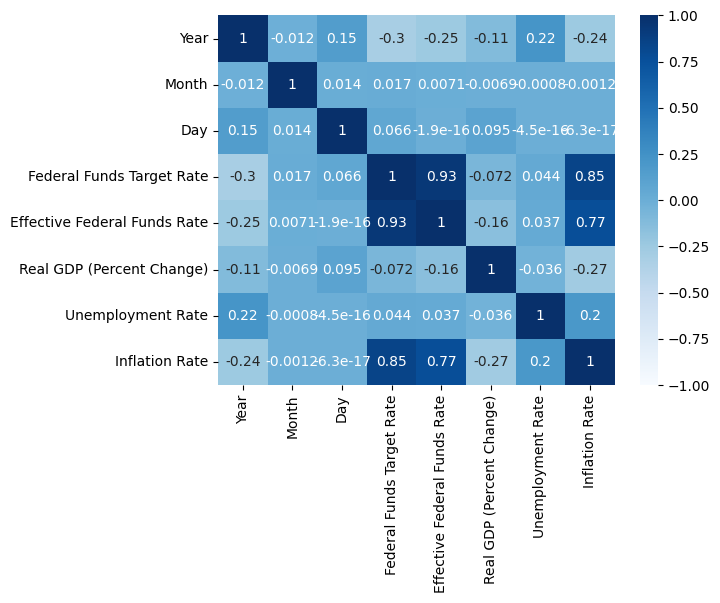

In [ ]:
sns.heatmap(df2.select_dtypes(include=np.number).corr(),vmax=1,vmin=-1,cmap='Blues',annot=True)
plt.show()

In [ ]:
df_sorted = df2.sort_values(by='Date', ascending=True)


In [ ]:
import plotly.express as px

fig = px.line(df_sorted, x="Date", y="Federal Funds Target Rate", title='Federal Funds Target Rate Trend')
fig.show()

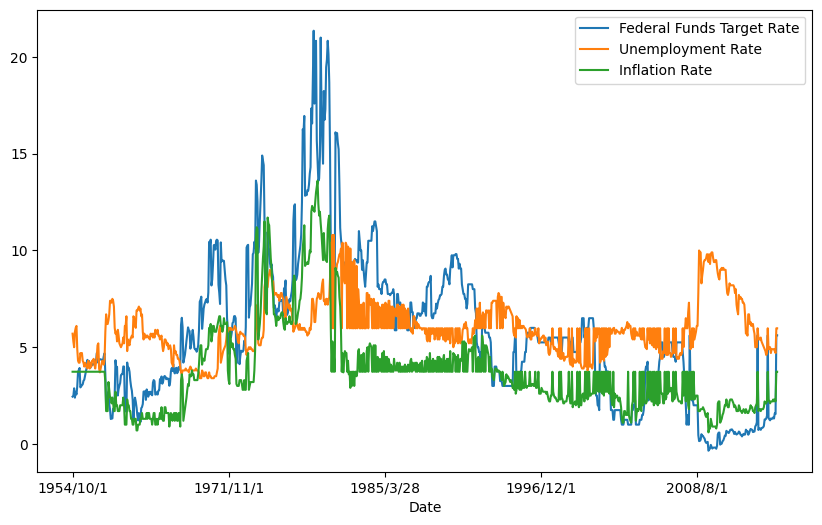

In [ ]:
data_index = df_sorted.set_index("Date")

# Select columns for plotting
data_kept = data_index[['Federal Funds Target Rate', 'Unemployment Rate', 'Inflation Rate']]

plt.rcParams["figure.figsize"] = (10, 6)
data_kept.plot()
plt.show()


In [ ]:
import plotly

data_index_2007 = df_sorted[df_sorted.Year>=2007]
data_index_2007 = data_index_2007[data_index_2007.Year<=2009]
data_index_2007 = data_index_2007.set_index("Date")
data_kept_2007 = data_index_2007[['Federal Funds Target Rate','Unemployment Rate','Inflation Rate']]

fig = px.line(data_kept_2007,title='Macro data during financial crisis')
fig.show()

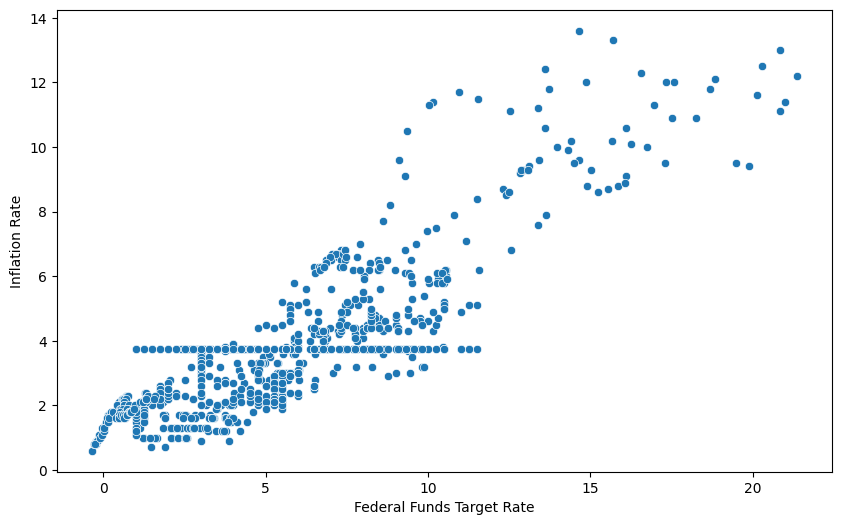

In [ ]:
sns.scatterplot(x='Federal Funds Target Rate',y='Inflation Rate',data=df_sorted)
plt.show()

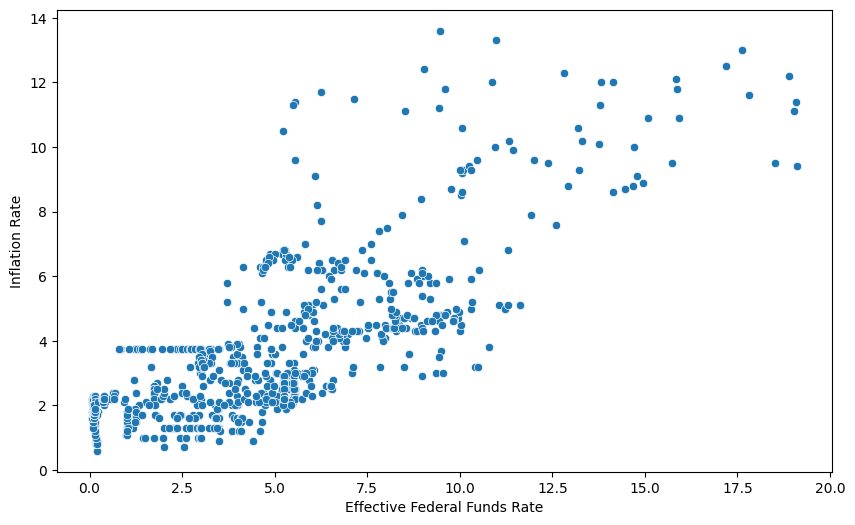

In [ ]:
sns.scatterplot(x='Effective Federal Funds Rate',y='Inflation Rate',data=df_sorted)
plt.show()

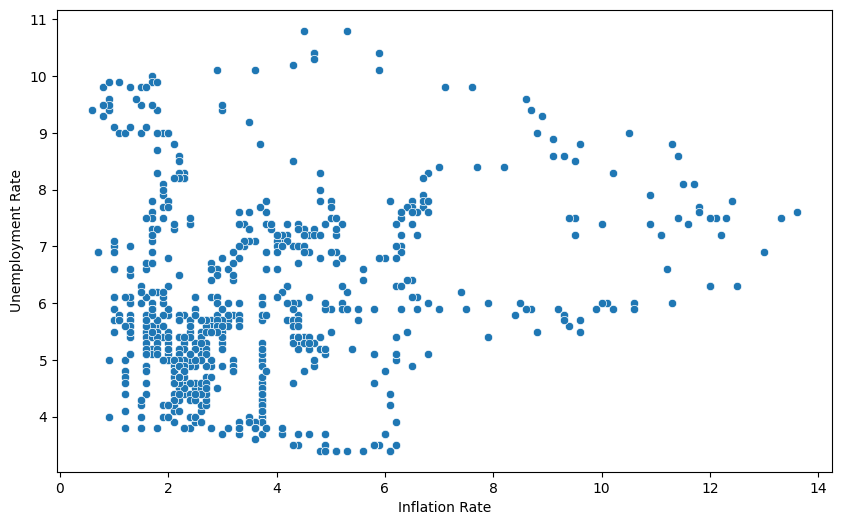

In [ ]:
sns.scatterplot(x='Inflation Rate',y='Unemployment Rate',data=df_sorted)
plt.show()

Stationarity Check

In [ ]:
from statsmodels.tsa.stattools import adfuller

# ADF test for stationarity
result = adfuller(df_sorted['Federal Funds Target Rate'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -2.7473655648069006
p-value: 0.06619441699943736


In [ ]:
result = adfuller(df_sorted['Unemployment Rate'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -3.2223994447871345
p-value: 0.018724175545028227


rolling mean and standard deviation

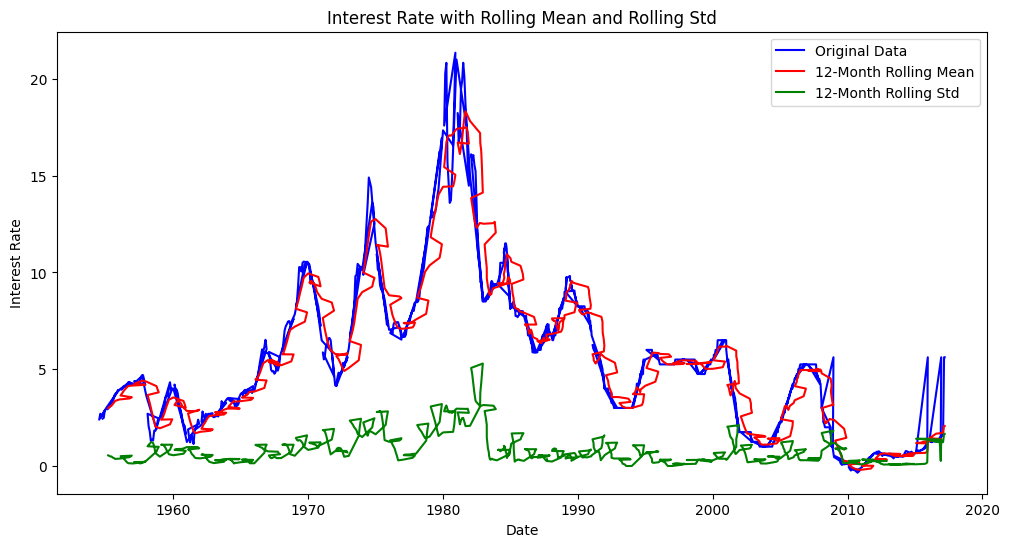

In [ ]:
df_sorted['Date'] = pd.to_datetime(df_sorted['Date'])
df_sorted.set_index('Date', inplace=True)

# Calculate rolling mean and standard deviation
window_size = 12
rolling_mean = df_sorted['Federal Funds Target Rate'].rolling(window=window_size).mean()
rolling_std = df_sorted['Federal Funds Target Rate'].rolling(window=window_size).std()

# Plot the original time series, rolling mean, and rolling standard deviation
plt.figure(figsize=(12, 6))
plt.plot(df_sorted['Federal Funds Target Rate'], label='Original Data', color='blue')
plt.plot(rolling_mean, label=f'{window_size}-Month Rolling Mean', color='red')
plt.plot(rolling_std, label=f'{window_size}-Month Rolling Std', color='green')
plt.xlabel('Date')
plt.ylabel('Interest Rate')
plt.title('Interest Rate with Rolling Mean and Rolling Std')
plt.legend()
plt.show()


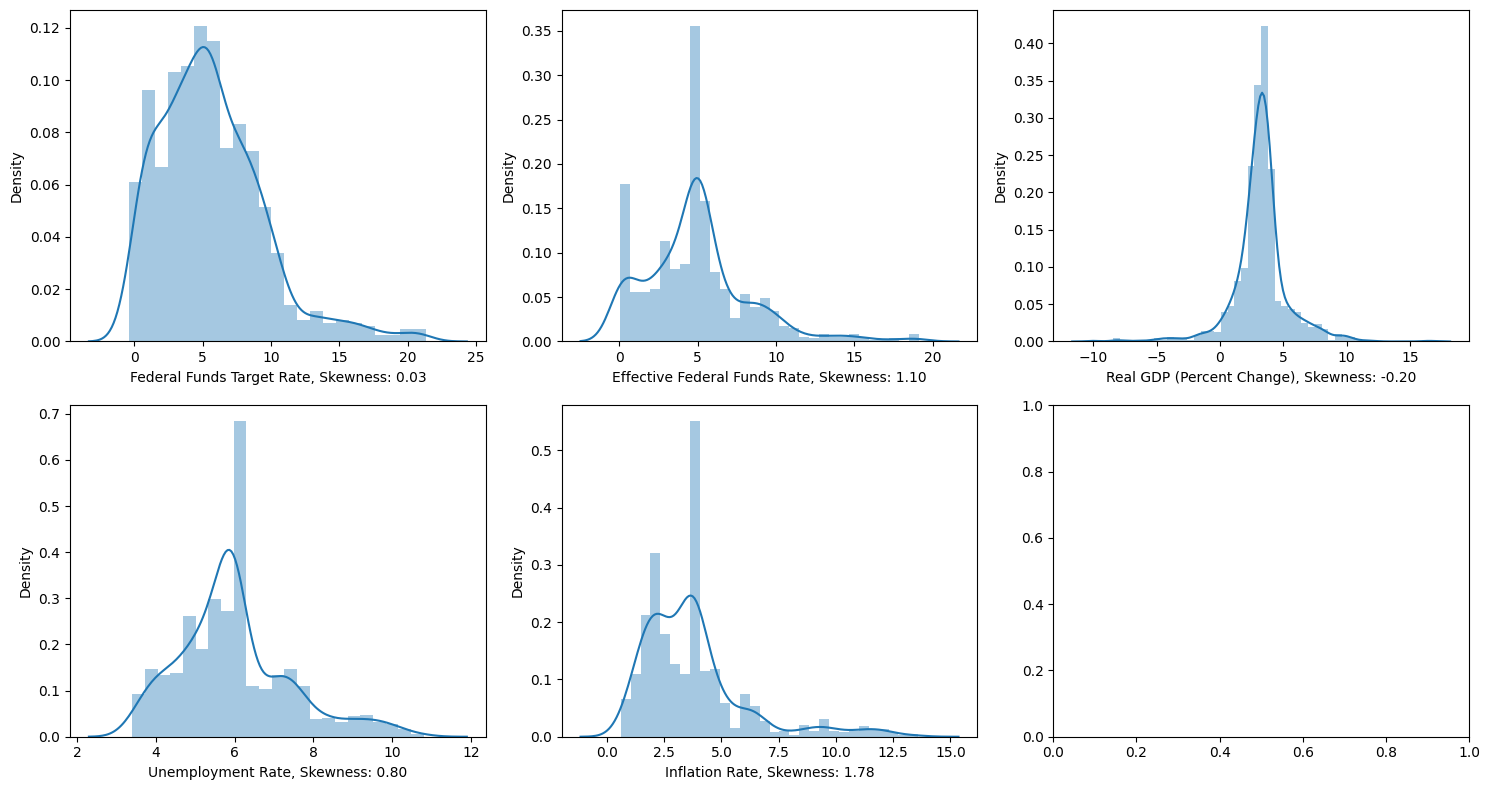

In [ ]:
|## skewness checking

columns_to_check = ['Federal Funds Target Rate','Effective Federal Funds Rate',	'Real GDP (Percent Change)','Unemployment Rate','Inflation Rate']


# Calculate the number of subplots needed based on the number of columns
num_subplots = len(columns_to_check)

# Determine the layout for subplots
num_rows = 2
num_cols = 3

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))

# Flatten the axes if there's only one row
if num_rows == 1:
    axes = [axes]

for i, col in enumerate(columns_to_check):
    row_index = i // num_cols
    col_index = i % num_cols
    sns.distplot(df_sorted[col], ax=axes[row_index][col_index])
    axes[row_index][col_index].set_xlabel('%s, Skewness: %.2f' % (col, df[col].skew()))

# Adjust the layout
plt.tight_layout()

plt.show()


In [ ]:
Target_rate = df_sorted.filter(['Federal Funds Target Rate'])
Target_rate.sort_values(by='Date')

,Federal Funds Target Rate
Date,
1954-07-01,2.394059
1954-08-01,2.699839
1954-09-01,2.560497
1954-10-01,2.446521
1954-11-01,2.482611
...,...
2016-12-14,5.617765
2017-01-01,1.585143
2017-02-01,1.548794


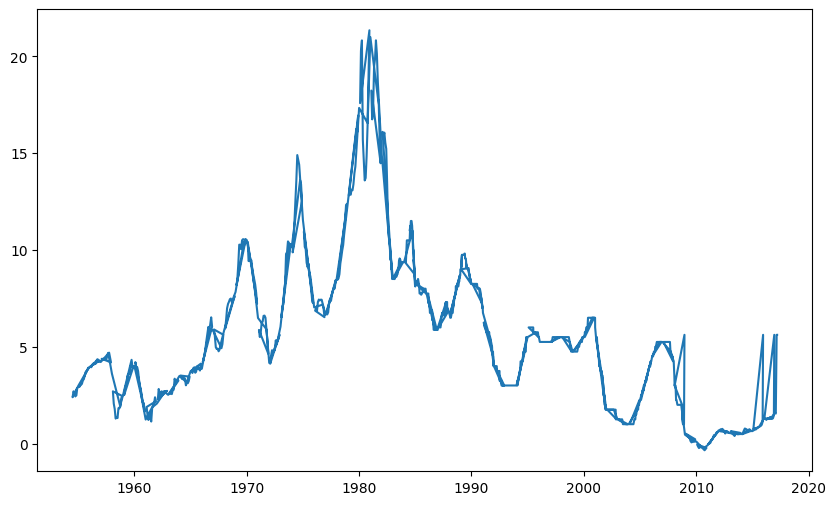

In [ ]:
plt.plot(Target_rate)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
Target_rate1 = scaler.fit_transform(np.array(Target_rate).reshape(-1,1))

In [ ]:
Target_rate1

array([[0.12875917],
       [0.13042229],
       [0.14859413],
       [0.12634157],
       [0.14043269],
       [0.13401144],
       [0.15319554],
       [0.18771938],
       [0.19232079],
       [0.19705237],
       [0.15075138],
       [0.15353295],
       [0.15584693],
       [0.15823798],
       [0.16647907],
       [0.16913047],
       [0.17812604],
       [0.1867311 ],
       [0.19715599],
       [0.21631611],
       [0.21101332],
       [0.21379489],
       [0.19957359],
       [0.1977803 ],
       [0.20334344],
       [0.20628173],
       [0.20482586],
       [0.20568397],
       [0.20674933],
       [0.21595214],
       [0.21015521],
       [0.23238379],
       [0.22078993],
       [0.20927313],
       [0.21777198],
       [0.21751164],
       [0.21777198],
       [0.21657646],
       [0.21538093],
       [0.21561473],
       [0.22531168],
       [0.23188965],
       [0.18215937],
       [0.1037429 ],
       [0.1238382 ],
       [0.12929772],
       [0.14035617],
       [0.110

In [ ]:
#spliting the dataset into train and test split
training_size = int(len(Target_rate1) * 0.70)
test_size = len(Target_rate1)-training_size


In [ ]:
training_size,test_size

(632, 272)

In [ ]:
train_data,test_data  = Target_rate1[0:training_size,:],Target_rate1[training_size:len(Target_rate1),:1]

In [ ]:
len(train_data),len(test_data)

(632, 272)

In [ ]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [ ]:
X_train.shape,y_train.shape


((531, 100), (531,))

In [ ]:
X_test.shape,y_test.shape

((171, 100), (171,))

In [ ]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
X_train.shape

(531, 100, 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
##stacked LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
9/9 [==============================] - 11s 355ms/step - loss: 0.0640 - val_loss: 0.0159
Epoch 2/100
9/9 [==============================] - 2s 188ms/step - loss: 0.0178 - val_loss: 0.0092
Epoch 3/100
9/9 [==============================] - 2s 191ms/step - loss: 0.0136 - val_loss: 0.0153
Epoch 4/100
9/9 [==============================] - 3s 323ms/step - loss: 0.0109 - val_loss: 0.0084
Epoch 5/100
9/9 [==============================] - 2s 209ms/step - loss: 0.0098 - val_loss: 0.0118
Epoch 6/100
9/9 [==============================] - 2s 193ms/step - loss: 0.0095 - val_loss: 0.0062
Epoch 7/100
9/9 [==============================] - 2s 190ms/step - loss: 0.0089 - val_loss: 0.0076
Epoch 8/100
9/9 [==============================] - 2s 189ms/step - loss: 0.0085 - val_loss: 0.0040
Epoch 9/100
9/9 [==============================] - 2s 209ms/step - loss: 0.0091 - val_loss: 0.0073
Epoch 10/100
9/9 [==============================] - 2s 223ms/step - loss: 0.0090 - val_loss: 0.0040
Epoch 11

In [ ]:
#prediction
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

6/6 [==============================] - 0s 40ms/step


In [ ]:
#transforming the output to the original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
# Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

7.33906149599937

In [ ]:
# Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

2.262220562941094

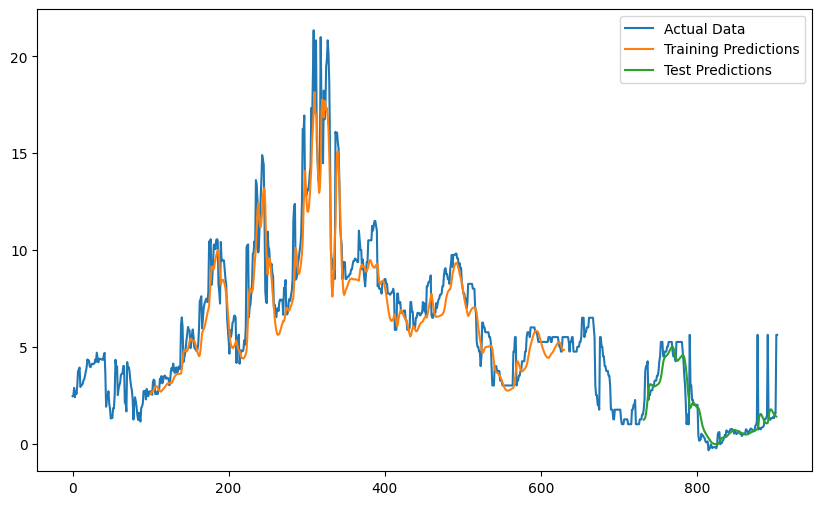

In [ ]:
from sklearn.metrics.pairwise import np

look_back = 100

trainPredictPlot = np.empty_like(Target_rate1)
trainPredictPlot[:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back] = train_predict

testPredictPlot = np.empty_like(Target_rate1)
testPredictPlot[:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(Target_rate1)-1] = test_predict

plt.plot(scaler.inverse_transform(Target_rate1), label='Actual Data')
plt.plot(trainPredictPlot, label='Training Predictions')
plt.plot(testPredictPlot, label='Test Predictions')

plt.legend()
plt.show()

In [ ]:
len(test_data)

272

In [ ]:
X_input = test_data[172:].reshape(1,-1) #previous 100 days data before from 377
X_input.shape


(1, 100)

In [ ]:
temp_input=list(X_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.023467892751051482,
 0.026104663855421508,
 0.03930854911837538,
 0.035461626092051494,
 0.03521320492667859,
 0.031277285445383315,
 0.02913465481266012,
 0.022041273568635333,
 0.01880673951474128,
 0.019884016913006303,
 0.021064916789148534,
 0.0,
 0.0028824904106439404,
 0.00550733735120713,
 0.013882539090152359,
 0.009103137353059145,
 0.005285466372546895,
 0.007078755221118975,
 0.007546345506053124,
 0.007546345506053124,
 0.007312550363586049,
 0.0046757792592160285,
 0.01161243765193827,
 0.03877053057801111,
 0.042966795388486134,
 0.04320059053095321,
 0.014483003898775371,
 0.016391839389031496,
 0.01697497631564971,
 0.022482313666856824,
 0.024521321821702823,
 0.029664691365853,
 0.03603013699576388,
 0.03530220138164998,
 0.04739685534142821,
 0.04538709923239387,
 0.04334809107754786,
 0.042152565178499815,
 0.0454880198511721,
 0.04981445732623699,
 0.05017842513329393,
 0.05090636074740783,
 0.04826958964303782,
 0.045632818538667796,
 0.03986513585828092,
 0.0

In [ ]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        X_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,X_input))
        X_input=X_input.reshape(1,-1)
        X_input = X_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(X_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        X_input = X_input.reshape((1, n_steps,1))
        yhat = model.predict(X_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
print(lst_output)


0 day input [0.02610466 0.03930855 0.03546163 0.0352132  0.03127729 0.02913465
 0.02204127 0.01880674 0.01988402 0.02106492 0.         0.00288249
 0.00550734 0.01388254 0.00910314 0.00528547 0.00707876 0.00754635
 0.00754635 0.00731255 0.00467578 0.01161244 0.03877053 0.0429668
 0.04320059 0.014483   0.01639184 0.01697498 0.02248231 0.02452132
 0.02966469 0.03603014 0.0353022  0.04739686 0.0453871  0.04334809
 0.04215257 0.04548802 0.04981446 0.05017843 0.05090636 0.04826959
 0.04563282 0.03986514 0.04465916 0.04082687 0.03851559 0.03994491
 0.0415044  0.04562089 0.04381568 0.03830834 0.03745024 0.03408553
 0.03791783 0.04019063 0.03815162 0.03873746 0.0501188  0.04688427
 0.04653493 0.0381397  0.04114044 0.04712999 0.05180577 0.05072849
 0.04976676 0.04449322 0.04628651 0.0455732  0.05803182 0.06066859
 0.06767298 0.27489791 0.04940549 0.05264003 0.053004   0.04976946
 0.05396573 0.05456349 0.05552522 0.05875976 0.07454719 0.07469199
 0.07625148 0.08302207 0.27489791 0.07863983 0.0746

In [ ]:
day_new=np.arange(0,100)
day_pred=np.arange(100,130)

In [ ]:
len(lst_output)

30

In [ ]:
scaler.inverse_transform(lst_output)

array([[2.53647855],
       [2.76063229],
       [2.87485351],
       [2.92947814],
       [2.95673952],
       [2.97281982],
       [2.98388224],
       [2.99094891],
       [2.99288519],
       [2.98796464],
       [2.9746219 ],
       [2.95176013],
       [2.91885743],
       [2.87597815],
       [2.82370886],
       [2.76307041],
       [2.69540344],
       [2.6222481 ],
       [2.5452296 ],
       [2.46595373],
       [2.38592509],
       [2.3064822 ],
       [2.22876493],
       [2.15369515],
       [2.08198199],
       [2.01412828],
       [1.95045931],
       [1.89114549],
       [1.83623728],
       [1.78569359]])

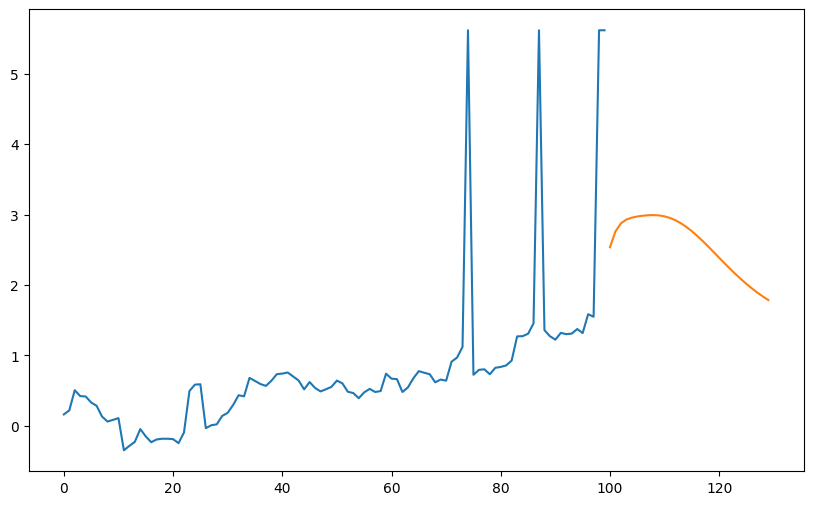

In [ ]:
plt.plot(day_new,scaler.inverse_transform(Target_rate1[804:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))